## <center> Movie Review Classification (IMDB) </center>

### <center> KERAS </center> 

In [16]:
import numpy as np

In [4]:
from tensorflow.keras.datasets import imdb  

import warnings
warnings.filterwarnings('ignore')

#### Dataset 

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) 

In [8]:
train_data.shape

(25000,)

In [11]:
 max([max(sequence) for sequence in train_data])

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

####  Encoding the integer sequences into a binary matrix 

In [17]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train.shape

(25000, 10000)

In [20]:
y_train = np.asarray(train_labels).astype('float32') 
y_test = np.asarray(test_labels).astype('float32')

In [22]:
y_train.shape

(25000,)

#### Model 

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [24]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


####  Configuring the optimizer 

In [26]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [29]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.5629 - binary_accuracy: 0.7436 - val_loss: 0.4379 - val_binary_accuracy: 0.8649
Epoch 2/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.3521 - binary_accuracy: 0.8943 - val_loss: 0.3316 - val_binary_accuracy: 0.8820
Epoch 3/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.2527 - binary_accuracy: 0.9207 - val_loss: 0.2883 - val_binary_accuracy: 0.8905
Epoch 4/20
15000/15000 [==============================] - 1s 79us/sample - loss: 0.1986 - binary_accuracy: 0.9358 - val_loss: 0.2784 - val_binary_accuracy: 0.8902
Epoch 5/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.1590 - binary_accuracy: 0.9492 - val_loss: 0.3010 - val_binary_accuracy: 0.8796
Epoch 6/20
15000/15000 [==============================] - 1s 80us/sample - loss: 0.1314 - binary_accuracy: 0.9592 - val_loss: 0.2825 -

In [31]:
 history_dict = history.history

In [32]:
 history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

####  Plotting the training and validation loss 

In [34]:
import matplotlib.pyplot as plt 

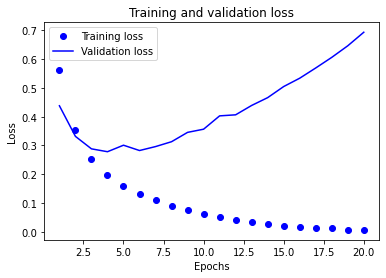

In [36]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

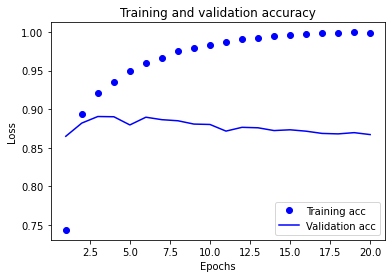

In [40]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Retraining a model from scratch

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 57us/sample - loss: 0.4630 - acc: 0.8271
Epoch 2/4
25000/25000 [==============================] - 1s 50us/sample - loss: 0.2699 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 1s 55us/sample - loss: 0.2069 - acc: 0.9273
Epoch 4/4
25000/25000 [==============================] - 2s 68us/sample - loss: 0.2859 - acc: 0.8868


In [42]:
results

[0.2858794582653046, 0.88684]

#### Using a trained network to generate predictions on new data

In [43]:
model.predict(x_test)

array([[0.23967892],
       [0.99982625],
       [0.88762546],
       ...,
       [0.11793447],
       [0.08536926],
       [0.53934246]], dtype=float32)

#### FNet ;) 

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
model.fit(x_train, y_train, epochs=10, batch_size=128)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 1s 59us/sample - loss: 0.3382 - acc: 0.8612
Epoch 2/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.1852 - acc: 0.9314
Epoch 3/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.1355 - acc: 0.9519
Epoch 4/10
25000/25000 [==============================] - 1s 53us/sample - loss: 0.1036 - acc: 0.9650
Epoch 5/10
25000/25000 [==============================] - 1s 55us/sample - loss: 0.0756 - acc: 0.9764
Epoch 6/10
25000/25000 [==============================] - 1s 53us/sample - loss: 0.0543 - acc: 0.9839
Epoch 7/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.0356 - acc: 0.9905
Epoch 8/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.0261 - acc: 0.9932
Epoch 9/10
25000/25000 [==============================] - 1s 54us/sample - loss: 0.0226 - acc: 0.9942
Epoch 10/10
25000/25000 [==============================] - 2s 60us/sample - loss: 

In [57]:
results

[0.299293592414856, 0.876]

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 32)                320032    
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 320,849
Trainable params: 320,849
Non-trainable params: 0
_________________________________________________________________


## <center>  Classifying newswires </center> 
### Multiclass problem 

In [71]:
from tensorflow.keras.datasets import reuters

import numpy as np
# save np.load
np_load_old = np.load

In [72]:
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k) 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [73]:
train_data.shape

(8982,)

In [74]:
 train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

####  Decoding newswires back to text

In [75]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


#### Encoding the data

In [76]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [77]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [78]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Note that there is a built-in way to do this in Keras 

####   Building your network

In [82]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Compiling the model

In [83]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#### Setting aside a validation set

In [84]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:] 

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Training the model 

In [85]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 109us/sample - loss: 2.8190 - acc: 0.4023 - val_loss: 1.9083 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 58us/sample - loss: 1.5188 - acc: 0.7087 - val_loss: 1.3384 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 0s 59us/sample - loss: 1.0701 - acc: 0.7732 - val_loss: 1.1269 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 0s 58us/sample - loss: 0.8273 - acc: 0.8267 - val_loss: 1.0342 - val_acc: 0.7750
Epoch 5/20
7982/7982 [==============================] - 0s 56us/sample - loss: 0.6557 - acc: 0.8675 - val_loss: 0.9502 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.5233 - acc: 0.8950 - val_loss: 0.9139 - val_acc: 0.8140
Epoch 7/20
7982/7982 [==============================] - 0s 57us/sample - loss: 0.4212 - acc: 0.9143 - val_loss: 0.8830 - val_acc:

#### Plotting the training and validation loss 

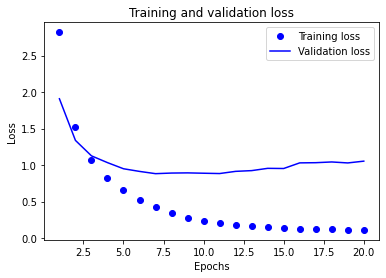

In [86]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the training and validation accuracy 

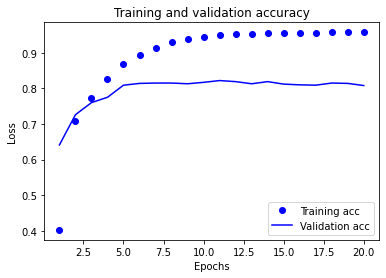

In [87]:
plt.clf()  ## Clears the figure 
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() 

#### Retraining a model from scratch

In [88]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels) 


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 102us/sample - loss: 2.4848 - acc: 0.5336 - val_loss: 1.5675 - val_acc: 0.6670
Epoch 2/9
7982/7982 [==============================] - 1s 66us/sample - loss: 1.2445 - acc: 0.7368 - val_loss: 1.1851 - val_acc: 0.7360
Epoch 3/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.8757 - acc: 0.8150 - val_loss: 1.0143 - val_acc: 0.7910
Epoch 4/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.6360 - acc: 0.8706 - val_loss: 0.9681 - val_acc: 0.7980
Epoch 5/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.4719 - acc: 0.9078 - val_loss: 0.9103 - val_acc: 0.8080
Epoch 6/9
7982/7982 [==============================] - 1s 68us/sample - loss: 0.3611 - acc: 0.9280 - val_loss: 0.8690 - val_acc: 0.8240
Epoch 7/9
7982/7982 [==============================] - 1s 67us/sample - loss: 0.2817 - acc: 0.9381 - val_loss: 0.9078 - val_acc: 0.8240